In [1]:
%matplotlib notebook
import numpy as np
import time
import tables as tb
import matplotlib.pyplot as plt

from tjmonopix.tjmonopix import TJMonoPix
from tjmonopix.online_monitor import noise_monitor, plots
from tjmonopix.analysis import analysis_functions

import tjmonopix.scans.injection_scan

chip = TJMonoPix(conf="../tjmonopix/tjmonopix_mio3.yaml", no_power_reset=False)
chip.init(fl="EN_HV")

chip['data_rx'].CONF_START_FREEZE = 64 #default 3
chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
chip['data_rx'].CONF_START_READ = 66 #default 6
chip['data_rx'].CONF_STOP_READ = 68 #default 7
chip['data_rx'].CONF_STOP = 105 #default 45


2022-03-01 15:45:39,051 [INFO ] (MainThread) GPAC: power reset
2022-03-01 15:45:40,812 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card (GPAC) with ID 3
2022-03-01 15:45:41,040 [INFO ] (MainThread) Found board 0 running firmware version 0.0
2022-03-01 15:45:41,280 [INFO ] (MainThread) ibias = 45
2022-03-01 15:45:41,301 [INFO ] (MainThread) ibias = 503.125 nA
2022-03-01 15:45:41,923 [INFO ] (MainThread) {'VPC [V]': 1.2998506463536463, 'VDDA_DAC [mA]': 3.002966091804109, 'VDDP [V]': 1.8049802771084336, 'VDDP OC': False, 'VDDA [mA]': 50.151368865825674, 'VDDD [V]': 1.8015140363636364, 'VDDA_DAC OC': False, 'VDDD [mA]': 2.820288999038665e-08, 'VPCSWSF [V]': 0.5001542395802099, 'VDDP [mA]': 128.39714805315754, 'BiasSF [V]': 1.0607798444853909, 'VDDD OC': False, 'VPC [mA]': -0.0029999814794099723, 'VPCSWSF [mA]': -0.10755336151832395, 'VDDA [V]': 1.8058565495495498, 'VDDA OC': False, 'VDDA_DAC [V]': 1.8045472377622378, 'BiasSF [mA]': 0.10059447096451782}


In [2]:
chip.get_power_status()

{'BiasSF [V]': 1.061780067228218,
 'BiasSF [mA]': 0.10059447096451782,
 'VDDA OC': False,
 'VDDA [V]': 1.8058565495495498,
 'VDDA [mA]': 50.151368865825674,
 'VDDA_DAC OC': False,
 'VDDA_DAC [V]': 1.8045472377622378,
 'VDDA_DAC [mA]': 2.502471747485684,
 'VDDD OC': False,
 'VDDD [V]': 1.8015140363636364,
 'VDDD [mA]': 2.820288999038665e-08,
 'VDDP OC': False,
 'VDDP [V]': 1.8059798142570278,
 'VDDP [mA]': 128.39714805315754,
 'VPC [V]': 1.2998506463536463,
 'VPC [mA]': 0.19499914627026416,
 'VPCSWSF [V]': 0.5001542395802099,
 'VPCSWSF [mA]': 0.031015395726741883}

In [11]:
vl_dac = 40
vh_dac = 80
vreset_dac = 35
icasn_dac = 0  # This sets the baseline voltage of the discriminator input
ireset_dac = 2
ithr_dac = 5  # Also this sets the baseline voltage of the discriminator input
idb_dac = 75  # This sets the threshold of the discriminator. It is changed later.
ibias_dac = 100

vl = chip.set_vl_dacunits(vl_dac,1)
vh = chip.set_vh_dacunits(vh_dac,1)

chip.write_conf()

vreset = chip.set_vreset_dacunits(vreset_dac, 1) 
icasn = chip.set_icasn_dacunits(icasn_dac,1) 

ireset = chip.set_ireset_dacunits(ireset_dac,1,1) 
ithr = chip.set_ithr_dacunits(ithr_dac,1) 

idb = chip.set_idb_dacunits(idb_dac,1) 
ibias = chip.set_ibias_dacunits(ibias_dac,1) 

chip.write_conf()

2022-03-01 15:52:35,930 [INFO ] (MainThread) vl = 0.951929133858V
2022-03-01 15:52:35,947 [INFO ] (MainThread) vh = 1.51885826772V
2022-03-01 15:52:35,971 [INFO ] (MainThread) vreset = 1.05106299213V
2022-03-01 15:52:35,990 [INFO ] (MainThread) icasn = 0
2022-03-01 15:52:36,010 [INFO ] (MainThread) icasn = 4.375 nA
2022-03-01 15:52:36,030 [INFO ] (MainThread) ireset = 2 high leakage mode
2022-03-01 15:52:36,046 [INFO ] (MainThread) ireset = 0.1025390625nA, high leakage mode
2022-03-01 15:52:36,071 [INFO ] (MainThread) ithr = 5
2022-03-01 15:52:36,091 [INFO ] (MainThread) ithr = 0.8203125 nA
2022-03-01 15:52:36,111 [INFO ] (MainThread) idb = 75
2022-03-01 15:52:36,125 [INFO ] (MainThread) idb = 1330.0 nA
2022-03-01 15:52:36,141 [INFO ] (MainThread) ibias = 100
2022-03-01 15:52:36,154 [INFO ] (MainThread) ibias = 1104.6875 nA


In [ ]:
%%time
chip.unmask_all()
dt = 0.2
plots.tj_plot(chip, dt = dt, wait_inj=False);


Enable MASKH 50
Got 16182 hits, total noisy pixels: 4
Enable MASKH 100
Got 64848 hits, total noisy pixels: 8
Enable MASKH 150
Got 5962 hits, total noisy pixels: 13
Enable MASKH 200
Got 108405 hits, total noisy pixels: 30
Enable MASKH 223
Got 16912 hits, total noisy pixels: 37
Enable MASKV 50
Got 3961 hits, total noisy pixels: 38
Enable MASKV 100
Got 12248 hits, total noisy pixels: 38
Enable MASKV 111
Got 6387 hits, total noisy pixels: 38
Enable MASKD 50
Got 10315 hits, total noisy pixels: 38
Enable MASKD 100
Got 6482 hits, total noisy pixels: 39
Enable MASKD 150
Got 2785 hits, total noisy pixels: 39
Enable MASKD 200
Got 6678 hits, total noisy pixels: 39
Enable MASKD 250
Got 9112 hits, total noisy pixels: 39
Enable MASKD 300
Got 9307 hits, total noisy pixels: 39
Enable MASKD 350
Got 2433 hits, total noisy pixels: 40
Enable MASKD 400
Got 11369 hits, total noisy pixels: 40
Enable MASKD 447
Got 2433 hits, total noisy pixels: 40
Checking again after masking
Got 6509 hits, total noisy pixels

<IPython.core.display.Javascript object>


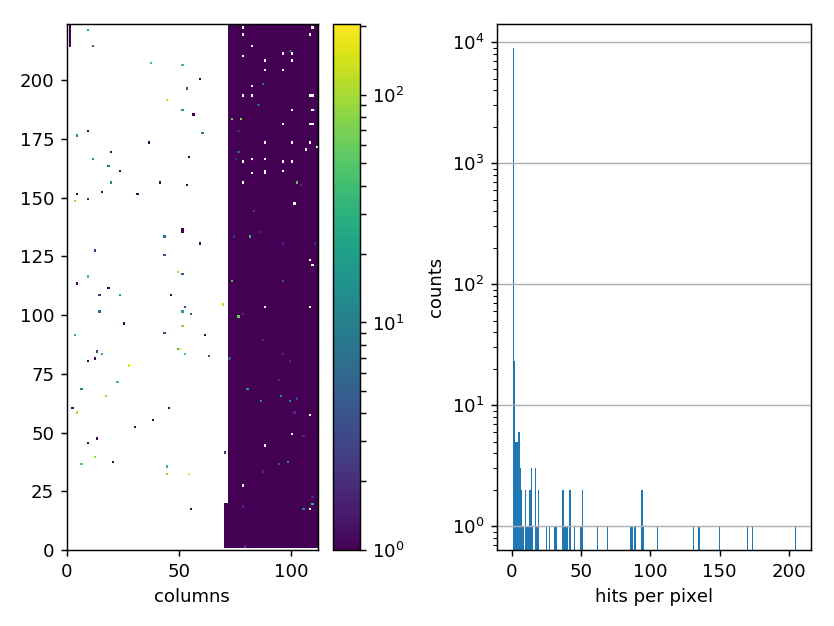

In [9]:
th = 200
step = 50
dt = 0.2
noisy_pixels, n_disabled_pixels, mask = chip.auto_mask(th=th, step=step, dt=dt)
plots.tj_plot(chip, dt = dt, wait_inj=False);


Enable MASKH 50
Got 23603 hits, total noisy pixels: 5
Enable MASKH 100
Got 78353 hits, total noisy pixels: 10
Enable MASKH 150
Got 10098 hits, total noisy pixels: 20
Enable MASKH 200
Got 140018 hits, total noisy pixels: 39
Enable MASKH 223
Got 31255 hits, total noisy pixels: 48
Enable MASKV 50
Got 10227 hits, total noisy pixels: 49
Enable MASKV 100
Got 3596 hits, total noisy pixels: 49
Enable MASKV 111
Got 7970 hits, total noisy pixels: 49
Enable MASKD 50
Got 9355 hits, total noisy pixels: 53
Enable MASKD 100
Got 2988 hits, total noisy pixels: 53
Enable MASKD 150
Got 3346 hits, total noisy pixels: 53
Enable MASKD 200
Got 11072 hits, total noisy pixels: 53
Enable MASKD 250
Got 7374 hits, total noisy pixels: 53
Enable MASKD 300
Got 10565 hits, total noisy pixels: 53
Enable MASKD 350
Got 5543 hits, total noisy pixels: 53
Enable MASKD 400
Got 10409 hits, total noisy pixels: 53
Enable MASKD 447
Got 2920 hits, total noisy pixels: 53
Checking again after masking
Got 7970 hits, total noisy pix

<IPython.core.display.Javascript object>


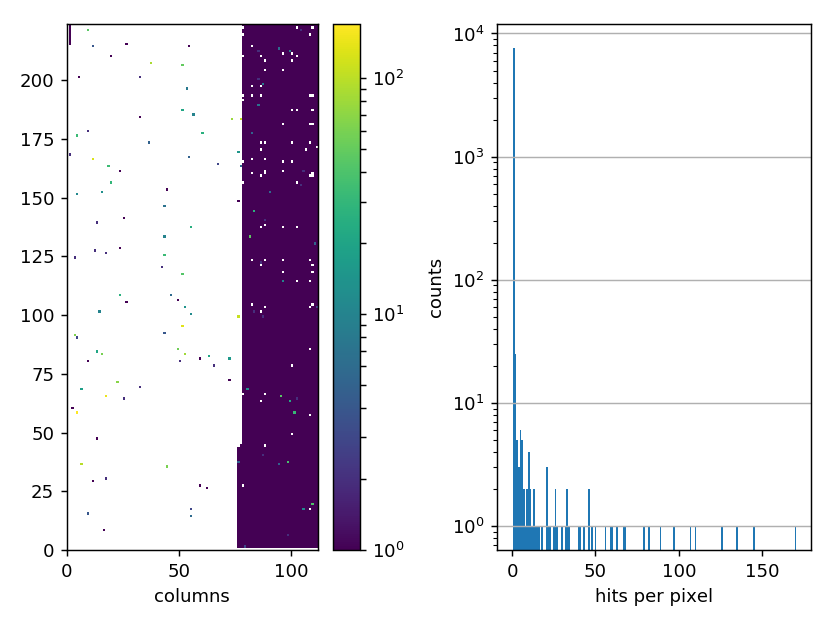

In [5]:
th = 200
step = 50
dt = 0.2
noisy_pixels, n_disabled_pixels, mask = chip.auto_mask(th=th, step=step, dt=dt)
plots.tj_plot(chip, dt = dt, wait_inj=False);


In [ ]:
th = 200
step = 50
dt = 0.2
noisy_pixels, n_disabled_pixels, mask = chip.auto_mask(th=th, step=step, dt=dt)
plots.tj_plot(chip, dt = dt, wait_inj=False);


Got 257338 hits in 20 s


<IPython.core.display.Javascript object>


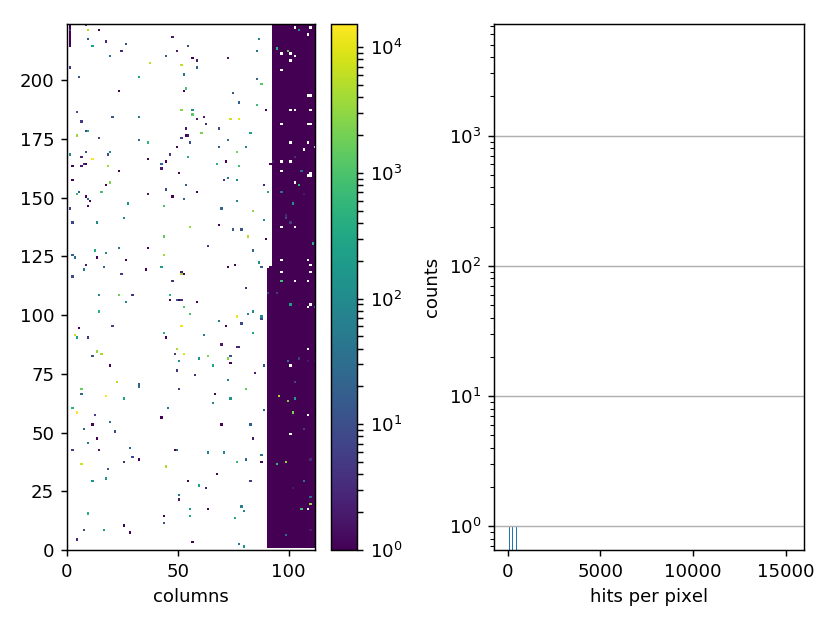

In [6]:
from tjmonopix.online_monitor import plots

plots.tj_plot(chip, dt = 20, wait_inj=False);

Got 223130 hits in 20 s


<IPython.core.display.Javascript object>


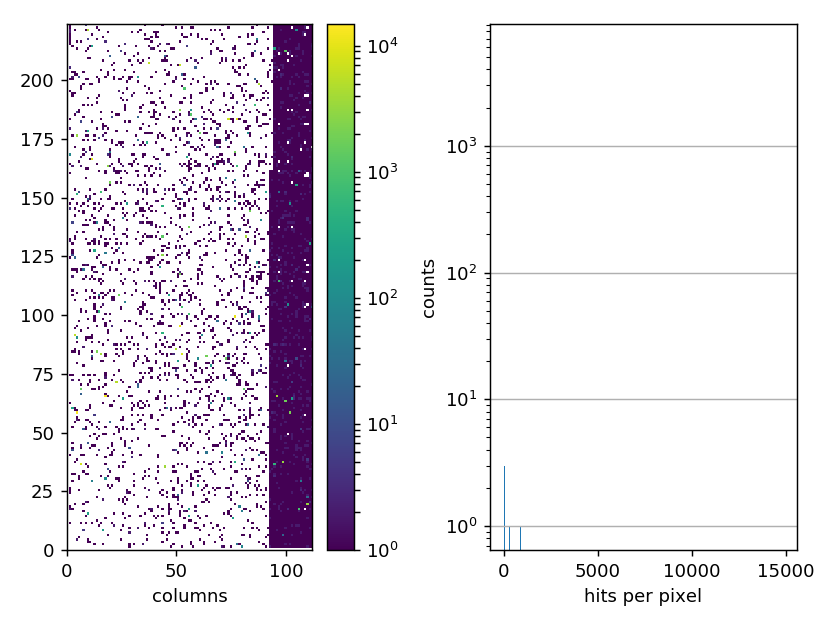

In [7]:
from tjmonopix.online_monitor import plots

plots.tj_plot(chip, dt = 20, wait_inj=False);

Got 198871 hits in 20 s


<IPython.core.display.Javascript object>


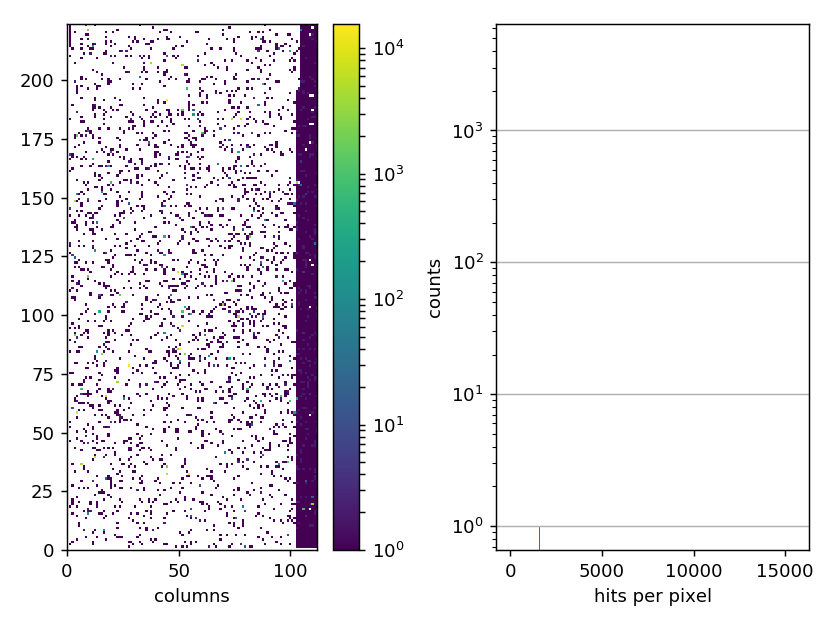

In [12]:
from tjmonopix.online_monitor import plots

plots.tj_plot(chip, dt = 20, wait_inj=False);


In [ ]:
from tjmonopix.online_monitor import plots

plots.tj_plot(chip, dt = 100, wait_inj=False);

Got 918651 hits in 100 s


<IPython.core.display.Javascript object>

In [ ]:
from tjmonopix.online_monitor import plots

hits, pixels, hits_per_pixel = plots.tj_plot(chip, dt = 30, wait_inj=False);
mask = hits_per_pixel < 10
print(len(hits_per_pixel[mask]))
mask = hits_per_pixel >200000
print(len(hits_per_pixel[mask]))


In [ ]:
plt.hist(hits_per_pixel, bins=np.max(hits_per_pixel));
plt.show()

In [ ]:
output_filename = 'test.h5'
hits, _, _ = chip.recv_data_summary(5)
with tb.open_file(output_filename, "w") as f:
    description = np.zeros((1,), dtype=hits.dtype)
    hit_table = f.create_table(f.root, name="Hits", description=description, title="Hit data")
    hit_table.append(hits)
    hit_table.flush()

In [ ]:
scans = tjmonopix.scans.injection_scan.InjectionScan(dut=chip)
scans.analyze(output_filename)